In [82]:
import numpy as np
from numpy import around 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import MetaTrader5 as mt5
# import pytz module for working with time zone
import pytz
from datetime import datetime, timedelta 
import os

In [282]:
mypath = '150.csv'
title = 'Vinati Jethra'
df = pd.read_csv(mypath , index_col=[0])
# pd.read_csv(mypath, index_col=[0]).columns

In [283]:
# https://www.mql5.com/en/signals/212158?source=Site+Signals+MT5+Table
# https://www.mql5.com/en/signals/1487129?source=Site+Signals+MT5+Table
# https://www.mql5.com/en/signals/843451?source=Site+Signals+MT5+Tile
df = df[(df['ordertype'] == 'Short') | (df['ordertype'] == 'Long')]
df = df[['symbol', 'ordertype', 'openorder_time', 'openorder_price', 'closeorder_time', 'closeorder_price', 'profit', 'pip_value', 'openorder_volume']]

# # calculate Duration
df['openorder_time'] = pd.to_datetime(df['openorder_time'])
df['closeorder_time'] = pd.to_datetime(df['closeorder_time'])
df['Duration'] = around( (df['closeorder_time']- df['openorder_time']).dt.total_seconds() / 60, decimals=2)

# calculate return in pip
df['PipReturn'] = ((df.loc[:,'closeorder_price'] - df.loc[:,'openorder_price']).values * df.loc[:,'symbol'].apply(
            lambda x : 100 if (type(x)==str and ( x.lower().find('jpy') != -1 or x.lower().find('xau') != -1)) else 10000
        ).values) * df['ordertype'].apply(lambda x : -1 if type(x)==str and x.lower().find('short') != -1 else 1).values

In [284]:
df['profit'].sum(), df['PipReturn'].sum()
# df[['openorder_volume', 'profit', 'PipReturn']]
# np.unique(df['openorder_volume'])

(1456.2900000000004, -403.60000000000383)

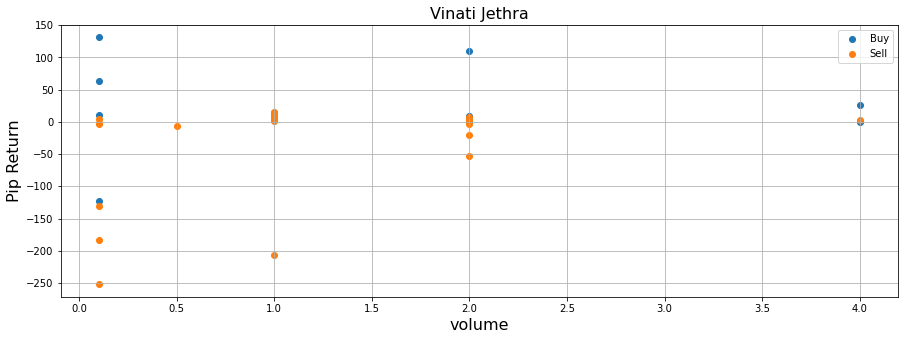

In [285]:
tempB = df[df['ordertype'] == 'Long'][['openorder_volume', 'PipReturn']]
tempS = df[df['ordertype'] == 'Short'][['openorder_volume', 'PipReturn']]

plt.figure(figsize=(15,5))
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid()

plt.scatter(tempB['openorder_volume'], tempB['PipReturn'],  label= 'Buy');
plt.scatter(tempS['openorder_volume'], tempS['PipReturn'], label= 'Sell');
plt.title(title, size=16)
plt.xlabel('volume', size=16)
plt.ylabel('Pip Return', size=16)
plt.legend();

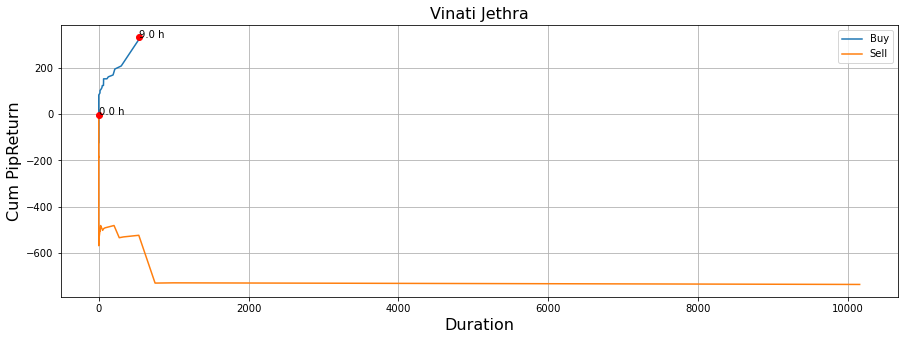

In [286]:
tempB = df[df['ordertype'] == 'Long'][['Duration', 'PipReturn']].sort_values(by='Duration', ascending=True)
tempB['cum_PipReturn'] = tempB['PipReturn'].cumsum()
tempS = df[df['ordertype'] == 'Short'][['Duration', 'PipReturn']].sort_values(by='Duration', ascending=True)
tempS['cum_PipReturn'] = tempS['PipReturn'].cumsum()

plt.figure(figsize=(15,5))
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid()

plt.plot(tempB['Duration'], tempB['cum_PipReturn'], label= 'Buy');
x = tempB.iloc[tempB['cum_PipReturn'].argmax()]['Duration']
y = tempB.iloc[tempB['cum_PipReturn'].argmax()]['cum_PipReturn']
plt.plot(x,y, 'ro');
plt.annotate( str(around(x/60, 1)) + ' h', (x,y))

plt.plot(tempS['Duration'], tempS['cum_PipReturn'], label= 'Sell');
x = tempS.iloc[tempS['cum_PipReturn'].argmax()]['Duration']
y = tempS.iloc[tempS['cum_PipReturn'].argmax()]['cum_PipReturn']
plt.plot(x, y, 'ro');
plt.annotate( str(around(x/60, 1)) + ' h', (x,y))
plt.title(title, size=16)
plt.xlabel('Duration', size=16)
plt.ylabel('Cum PipReturn', size=16)
plt.legend();

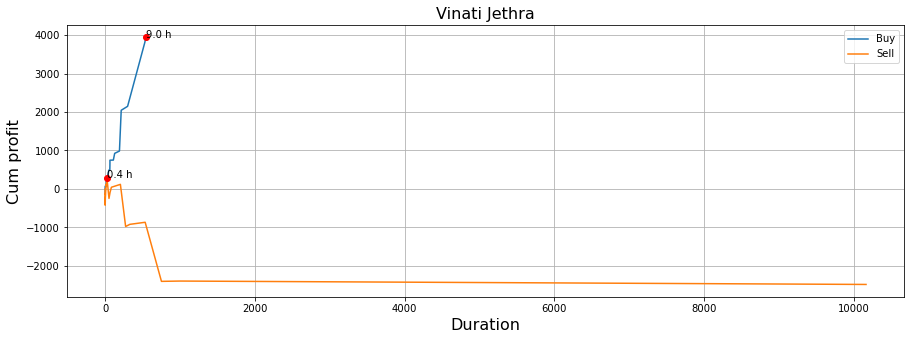

In [287]:
tempB = df[df['ordertype'] == 'Long'][['Duration', 'profit']].sort_values(by='Duration', ascending=True)
tempB['cum_profit'] = tempB['profit'].cumsum()
tempS = df[df['ordertype'] == 'Short'][['Duration', 'profit']].sort_values(by='Duration', ascending=True)
tempS['cum_profit'] = tempS['profit'].cumsum()

plt.figure(figsize=(15,5))
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid()

plt.plot(tempB['Duration'], tempB['cum_profit'], label= 'Buy');
x = tempB.iloc[tempB['cum_profit'].argmax()]['Duration']
y = tempB.iloc[tempB['cum_profit'].argmax()]['cum_profit']
plt.plot(x,y, 'ro');
plt.annotate( str(around(x/60, 1)) + ' h', (x,y))

plt.plot(tempS['Duration'], tempS['cum_profit'], label= 'Sell');
x = tempS.iloc[tempS['cum_profit'].argmax()]['Duration']
y = tempS.iloc[tempS['cum_profit'].argmax()]['cum_profit']
plt.plot(x, y, 'ro');
plt.annotate( str(around(x/60, 1)) + ' h', (x,y))
plt.title(title, size=16)
plt.xlabel('Duration', size=16)
plt.ylabel('Cum profit', size=16)
plt.legend();